In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2, os

from sklearn.cluster import KMeans
import easyocr

In [2]:
%cd .. 

/home/suetin/Projects/VSCode/ExciseProject/ExciseOCR


/home/suetin/Projects/VSCode/ExciseProject/.venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


# Read Full Image

In [3]:
from src.scripts.utils import load_image

data/digits3_0.png
(2339, 1654, 3)
ROI shape is (400, 160, 3)


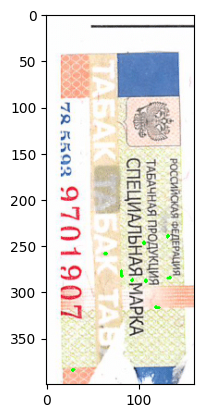

In [4]:
nRows = 1  # 5
mCols = 1  # 10 # Number of columns
# data/digits3_0.png
top_margin = 150
left_margin = 0 # 5
mark_width = 160
mark_height = 400

#
data_paths = ['data/digits3_0.png']#, 'aaaa']

for data_path in data_paths:
    print(data_path)
    # 1. Load full image
    full_image = load_image(data_path)
    print(full_image.shape)
    # 2. Split to 5x10
    for i in range(0, nRows):
        for j in range(0, mCols):
            # Save outputs for every image in 
            bboxs, values, probs = [], [], []

            h1 = int(i*mark_height) + top_margin
            h2 = int(i*mark_height + mark_height) + top_margin
            w1 = int(j*mark_width + left_margin)
            w2 = int(j*mark_width + mark_width) + left_margin
            roi = full_image[h1:h2, w1:w2]

            print(f"ROI shape is {roi.shape}")

            gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY) #convert roi into gray
            Blur=cv2.GaussianBlur(gray,(5,5),1) #apply blur to roi
            Canny=cv2.Canny(Blur,10,50) #apply canny to roi

            #Find my contours
            contours =cv2.findContours(Canny,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)[0]

            #Loop through my contours to find rectangles and put them in a list, so i can view them individually later.
            cntrRect = []
            for contour in contours:
                    epsilon = 0*cv2.arcLength(contour,True)
                    approx = cv2.approxPolyDP(contour,epsilon,True)
                    if len(approx) == 4:
                        roi = cv2.drawContours(roi, cntrRect,-1,(0,255,0),2)
                        plt.imshow(roi) # 'Roi Rect ONLY', roi)
                        cntrRect.append(approx)

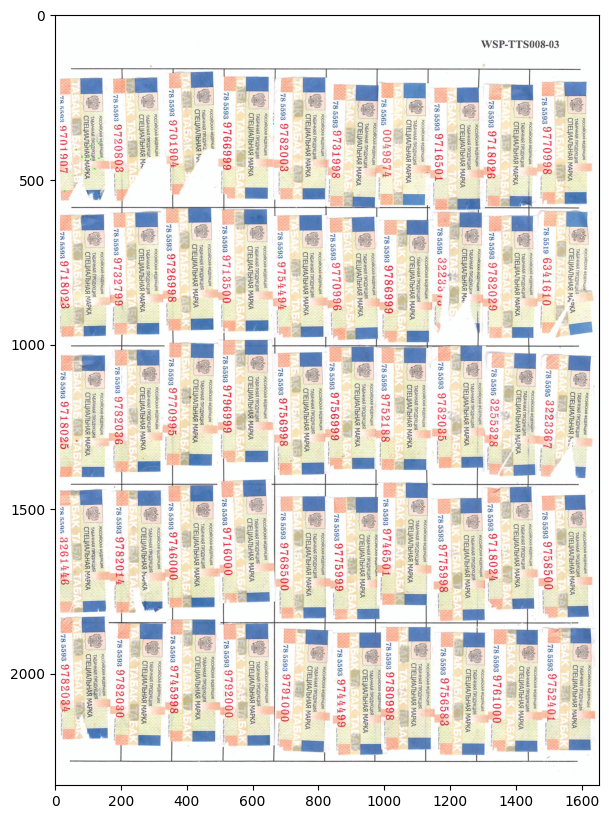

In [5]:
plt.figure(figsize=(15, 10))
plt.imshow(full_image)

In [6]:
new_img = full_image[:1000, :100].copy()
gray = cv2.cvtColor(new_img, cv2.COLOR_BGR2GRAY) #convert roi into gray
Blur=cv2.GaussianBlur(gray,(5,5),1) #apply blur to roi
Canny=cv2.Canny(Blur,10,50) #apply canny to roi

#Find my contours
contours =cv2.findContours(Canny,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)[0]

#Loop through my contours to find rectangles and put them in a list, so i can view them individually later.
cntrRect = []
for contour in contours:
        epsilon = 0.05*cv2.arcLength(contour,True)
        approx = cv2.approxPolyDP(contour,epsilon,True)
        if len(approx) == 4:
            new_img = cv2.drawContours(new_img, cntrRect,-1,(0,255,0),2)
            plt.imshow(new_img) # 'Roi Rect ONLY', roi)
            cntrRect.append(approx)

In [ ]:
y1=0
y2=700
x1=500
x2=700
img=cv2.imread('test.jpg') #read image
img=cv2.resize(img,(width,height)) #resize image
roi = img[y1:y2, x1:x2] #region of interest i.e where the rectangles will be
gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY) #convert roi into gray
Blur=cv2.GaussianBlur(gray,(5,5),1) #apply blur to roi
Canny=cv2.Canny(Blur,10,50) #apply canny to roi

#Find my contours
contours =cv2.findContours(Canny,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)[0]

#Loop through my contours to find rectangles and put them in a list, so i can view them individually later.
cntrRect = []
for i in contours:
        epsilon = 0.05*cv2.arcLength(i,True)
        approx = cv2.approxPolyDP(i,epsilon,True)
        if len(approx) == 4:
            cv2.drawContours(roi,cntrRect,-1,(0,255,0),2)
            cv2.imshow('Roi Rect ONLY',roi)
            cntrRect.append(approx)